In [20]:
# Packages
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

# Pipeline
from tree import TreeModel

# ===== import data; tr,ts ======
X_tr = pd.read_csv('split-data/processed/X_tr.csv')
X_ts = pd.read_csv('split-data/processed/X_ts.csv')
y_tr = pd.read_csv('split-data/processed/y_tr.csv')
y_ts = pd.read_csv('split-data/processed/y_ts.csv')

In [21]:
# ===== Decision Tree ======
start = time.time()

dt_params = {
    'X_tr': X_tr.to_numpy(),
    'X_ts': X_ts.to_numpy(),
    'y_tr': y_tr.to_numpy(),
    'y_ts': y_ts.to_numpy(),
    'model': DecisionTreeClassifier(),
    'name': 'Decision Tree'
}

dt_pipeline = TreeModel(**dt_params)

dt_fit_params = {
    'param_grid': {
        'max_depth': [2, 3, 5, 10, 20, 50, 75, 100],
        'min_samples_leaf': [1, 5, 10, 20, 50],
        'min_samples_split': [2, 5, 10, 20],
    },
    'balance_classes': True,
    'k_folds': 5,
    'scoring': 'accuracy'
}

dt_pipeline.fit_predict(**dt_fit_params)

end = time.time()
elapsed = end - start
print(f"Elapsed time: {elapsed:.2f} seconds")

Elapsed time: 26.55 seconds


In [22]:
dt_pipeline.tr_ts_scoring

DecisionTreeClassifier(class_weight='balanced')
Grid - Hyperparameters: ['max_depth', 'min_samples_leaf', 'min_samples_split']
Train Accuracy: 99.997%
Test Accuracy: 25.764%


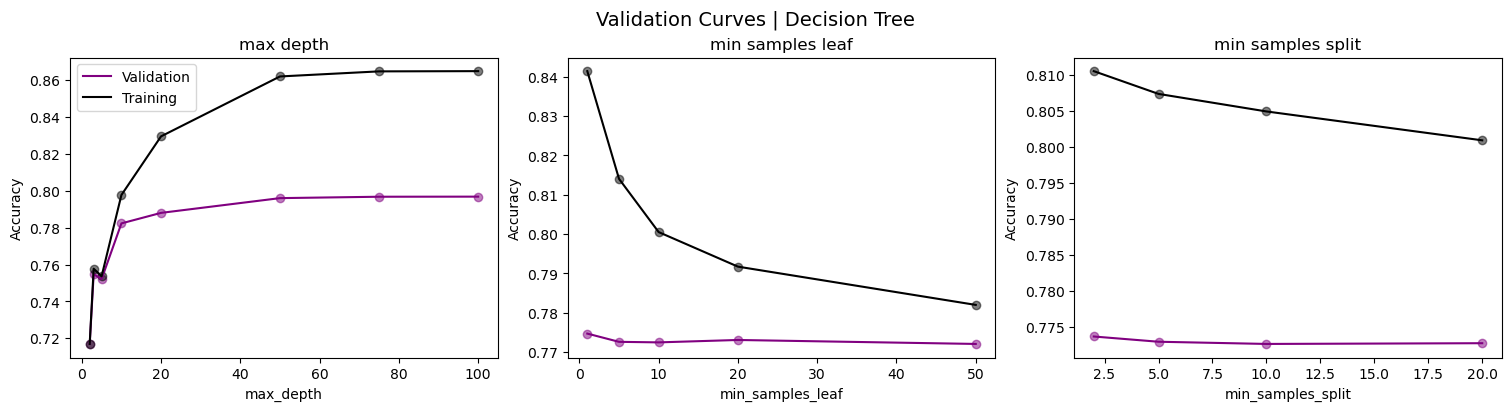

In [23]:
plot_vhgr_params = {
    'param_list':dt_pipeline.hyper_grid,
    'figsize':(5, 4),
    'save_path':'media/02_dt_val_grid_row.png'
}
dt_pipeline.plot_validation_hyperparam_grid_row(**plot_vhgr_params)